## Course: Introduction to Data Science  -> Project 

### Importing Necessary Modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from pandas.plotting import parallel_coordinates

# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

# matplotlib

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats
from numpy.polynomial.polynomial import polyfit
import pylab 
from sklearn import preprocessing

### Importing Dataset

In [2]:
data2015 = pd.read_csv('Dataset/2015.csv')
data2016 = pd.read_csv('Dataset/2016.csv')
data2017 = pd.read_csv('Dataset/2017.csv')

In [3]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
data2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [7]:
data2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

###### This shows that the data is similar across different years

### Renaming columns

In [9]:
data2015.columns = ['country','region','happiness_rank','happiness_score','standard_error','economy','family','health','freedom','trust','generosity','dystopia']
data2016.columns = ['country','region','happiness_rank','happiness_score','lower_confidence','upper_confidence','economy','family','health','freedom','trust','generosity','dystopia']
data2017.columns = ['country','happiness_rank','happiness_score','whisker_high','whisker_low','economy','family','health','freedom','generosity','trust','dystopia']

In [10]:
trace = go.Table(
    header=dict(values=list(data2015.columns),
                fill = dict(color='#C2D4FF'),
                align = ['left'] * 5),
    cells=dict(values=[data2015.country, data2015.region, data2015.happiness_rank, data2015.happiness_score, data2015.standard_error,data2015.economy,data2015.family, data2015.health,data2015.freedom,data2015.trust,data2015.generosity,data2015.dystopia],
               fill = dict(color='#F5F8FF'),
               align = ['left'] * 5))

data = [trace]
fig = dict(data = data)
iplot(fig)

## HEAT MAP 

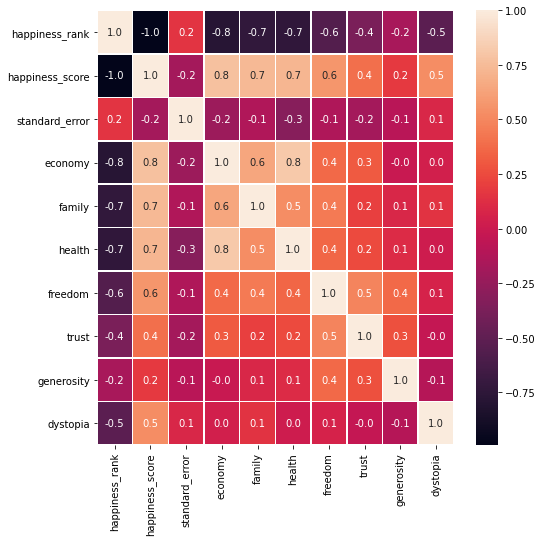

In [11]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data2015.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

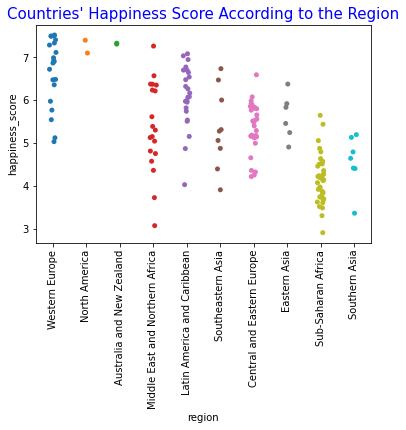

In [12]:
x = sns.stripplot(x = "region", y = "happiness_score", data = data2016, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", color = 'blue', fontsize = 15)
plt.show()

In [13]:
trace1 = go.Box(
    y = data2017.economy,
    name = 'Economic Situations of Countries in 2017',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace2 = go.Box(
    y = data2017.trust,
    name = 'Government Corruption Index in 2017',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace1, trace2]
iplot(data)

In [14]:
region_mean = data2015.groupby(['region'])['happiness_score'].mean()
region_mean.sort_values(ascending=False, inplace=True)

# Bar Chart
trace1 = go.Bar(
    x=region_mean.index,
    y=region_mean.values,
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Happiness ranking by region',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [15]:
import plotly.figure_factory as ff

dataframe = data2017
dt2017 = dataframe.loc[:,["economy", "health", "freedom"]]
dt2017["index"] = np.arange(1, len(dt2017) + 1)

fig = ff.create_scatterplotmatrix(dt2017, diag = 'box', index = 'index', colormap = 'Portland',
                                  colormap_type = 'cat',
                                  height = 700, width = 700)
iplot(fig)

In [16]:
dataframe = data2017
trace1 = go.Scatter(
    x = dataframe.happiness_rank,
    y = dataframe.economy,
    name = "Economy"
                    )
trace2 = go.Scatter(
    x = dataframe.happiness_rank,
    y = dataframe.health,
    xaxis = 'x2',
    yaxis = 'y2',
    name = "Health"
                    )
trace3 = go.Scatter(
    x = dataframe.happiness_rank,
    y = dataframe.freedom,
    xaxis = 'x3',
    yaxis = 'y3',
    name = "Freedom"
)
trace4 = go.Scatter(
    x = dataframe.happiness_rank,
    y = dataframe.trust,
    xaxis = 'x4',
    yaxis = 'y4',
    name = "Gov. Corruption"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis = dict(
        domain = [0, 0.45]
                ),
    yaxis = dict(
        domain = [0, 0.45]
                ),
    xaxis2 = dict(
        domain = [0.55, 1]
                 ),
    xaxis3 = dict(
        domain = [0, 0.45],
        anchor = 'y3'
                 ),
    xaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'y4'
                 ),
    yaxis2 = dict(
        domain = [0, 0.45],
        anchor = 'x2'
                 ),
    yaxis3 = dict(
        domain = [0.55, 1]
                 ),
    yaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'x4'
                 ),
    title = 'Economy, Health, Freedom and Gov. Corruption Effect in Happiness Rank of Countries'
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [17]:
df2017 = data2017.iloc[:3, :]

import plotly.graph_objs as go

trace1 = go.Bar(
                x = df2017.country,
                y = df2017.economy,
                name = "economy",
                marker = dict(color = 'rgba(125, 25, 200, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace2 = go.Bar(
                x = df2017.country,
                y = df2017.family,
                name = "family",
                marker = dict(color = 'rgba(25, 25, 25, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace3 = go.Bar(
                x = df2017.country,
                y = df2017.health,
                name = "health",
                marker = dict(color = 'rgba(190, 200, 100, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace4 = go.Bar(
                x = df2017.country,
                y = df2017.trust,
                name = "trust",
                marker = dict(color = 'rgba(50, 150, 50, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace5 = go.Bar(
                x = df2017.country,
                y = df2017.generosity,
                name = "generosity",
                marker = dict(color = 'rgba(255, 70, 12, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace6 = go.Bar(
                x = df2017.country,
                y = df2017.freedom,
                name = "freedom",
                marker = dict(color = 'rgba(255, 25, 55, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(barmode = 'group', title = 'Top 3 Countries in 2017 According to the Different Parameters')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [18]:
df2017 = data2017.iloc[:3, :]

import plotly.graph_objs as go

trace1 = {
  'x': df2017.country,
  'y': df2017.economy,
  'name': 'Economy',
  'type': 'bar'
};
trace2 = {
  'x': df2017.country,
  'y': df2017.family,
  'name': 'Family',
  'type': 'bar'
};
trace3 = {
  'x': df2017.country,
  'y': df2017.health,
  'name': 'Health',
  'type': 'bar'
};
trace4 = {
  'x': df2017.country,
  'y': df2017.trust,
  'name': 'Trust',
  'type': 'bar'
};
trace5 = {
  'x': df2017.country,
  'y': df2017.generosity,
  'name': 'Generosity',
  'type': 'bar'
};
trace6 = {
  'x': df2017.country,
  'y': df2017.freedom,
  'name': 'Freedom',
  'type': 'bar'
};
data = [trace1, trace2, trace3, trace4, trace5, trace6];
layout = {
  'xaxis': {'title': 'Top 3 Countries'},
  'barmode': 'relative',
  'title': 'Top 3 Countries in 2017 According to the Different Parameters'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [19]:
region_mean = data2015.groupby(['region'])['economy'].mean()
region_mean.sort_values(ascending=False, inplace=True)

# Bar Chart
trace1 = go.Bar(
    x=region_mean.index,
    y=region_mean.values,
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Economy ranking by region',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [20]:
region_mean = data2015.groupby(['region'])['family'].mean()
region_mean.sort_values(ascending=False, inplace=True)

# Bar Chart
trace1 = go.Bar(
    x=region_mean.index,
    y=region_mean.values,
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Family ranking by region',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [21]:
region_mean = data2015.groupby(['region'])['health'].mean()
region_mean.sort_values(ascending=False, inplace=True)

# Bar Chart
trace1 = go.Bar(
    x=region_mean.index,
    y=region_mean.values,
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Health ranking by region',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [22]:
region_mean = data2015.groupby(['region'])['trust'].mean()
region_mean.sort_values(ascending=False, inplace=True)

# Bar Chart
trace1 = go.Bar(
    x=region_mean.index,
    y=region_mean.values,
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Trust ranking by region',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [23]:
region_mean = data2015.groupby(['region'])['generosity'].mean()
region_mean.sort_values(ascending=False, inplace=True)

# Bar Chart
trace1 = go.Bar(
    x=region_mean.index,
    y=region_mean.values,
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Generosity ranking by region',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [24]:
region_mean = data2015.groupby(['region'])['freedom'].mean()
region_mean.sort_values(ascending=False, inplace=True)

# Bar Chart
trace1 = go.Bar(
    x=region_mean.index,
    y=region_mean.values,
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Freedom ranking by region',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [25]:
sorted_happiness = data2015.sort_values('happiness_score', ascending=False)

# Bar Chart
trace1 = go.Bar(
    x=sorted_happiness.country.head(21),
    y=sorted_happiness.happiness_score.head(21),
    marker=dict(
        color=['rgb(93, 100, 210)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
)

data = [trace1]
layout = go.Layout(
    barmode='stack'
)
layout = dict(title = '2015 Happiness ranking by country',
              xaxis= dict(title= 'Region',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [26]:
generosity_rank = data2015.sort_values('generosity', ascending=False)
economy_rank = data2015.sort_values('economy', ascending=False)

trace1 = go.Bar(
            x=generosity_rank.country.head(15),
            y=generosity_rank.generosity.head(15),
            opacity=0.65,
            name = 'Generosity')

trace2 = go.Bar(
            x=economy_rank.country.head(15),
            y=economy_rank.economy.head(15),
            opacity=0.65,
            name = 'Economy'
        )

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=())
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=650, width=900, title='2015 Generosity vs Economy')

iplot(fig)

In [27]:
health_rank = data2015.sort_values('health', ascending=False)
economy_rank = data2015.sort_values('economy', ascending=False)

trace1 = go.Bar(
            x=health_rank.country.head(15),
            y=health_rank.health.head(15),
            opacity=0.65,
            name = 'Health'
        )

trace2 = go.Bar(
            x=economy_rank.country.head(15),
            y=economy_rank.economy.head(15),
            opacity=0.65,
            name = 'Economy'
        )

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Health', 'Economy'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=650, width=900, title='2015 Health vs Economy')

iplot(fig)

In [28]:
trust_rank = data2015.sort_values('trust', ascending=False)
economy_rank = data2015.sort_values('economy', ascending=False)

trace1 = go.Bar(
            x=trust_rank.country.head(15),
            y=trust_rank.trust.head(15),
            opacity=0.65,
            name = 'Trust'
        )

trace2 = go.Bar(
            x=economy_rank.country.head(15),
            y=economy_rank.economy.head(15),
            opacity=0.65,
            name = 'Economy'
        )

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Trust', 'Economy'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=650, width=900, title='2015 Trust vs Economy')

iplot(fig)

In [29]:
happiness_rank = data2015.sort_values('happiness_score', ascending=False)
economy_rank = data2015.sort_values('economy', ascending=False)

trace1 = go.Bar(
            x=happiness_rank.country.head(15),
            y=happiness_rank.happiness_score.head(15),
            opacity=0.65,
            name = 'Happiness'
        )

trace2 = go.Bar(
            x=economy_rank.country.head(15),
            y=economy_rank.economy.head(15),
            opacity=0.65,
            name = 'Economy'
        )

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Happiness', 'Economy'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=650, width=900, title='2015 Happiness vs Economy')

iplot(fig)

In [30]:
happiness_rank = data2015.sort_values('happiness_score', ascending=False)
family_rank = data2015.sort_values('family', ascending=False)

trace1 = go.Bar(
            x=happiness_rank.country.head(15),
            y=happiness_rank.happiness_score.head(15),
            opacity=0.65,
            name = 'Happiness'
        )

trace2 = go.Bar(
            x=family_rank.country.head(15),
            y=family_rank.family.head(15),
            opacity=0.65,
            name = 'Family'
        )

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Happiness', 'Family'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=500, width=900, title='2015 Happiness vs Family')

iplot(fig)

In [31]:
happiness_rank = data2015.sort_values('happiness_score', ascending=False)
freedom_rank = data2015.sort_values('freedom', ascending=False)

trace1 = go.Bar(
            x=happiness_rank.country.head(15),
            y=happiness_rank.happiness_score.head(15),
            opacity=0.65,
            name = 'Happiness'
        )

trace2 = go.Bar(
            x=freedom_rank.country.head(15),
            y=freedom_rank.freedom.head(15),
            opacity=0.65,
            name = 'Freedom'
        )

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Happiness', 'Freedom'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=500, width=900, title='2015 Happiness vs Freedom')

iplot(fig)

##### To compare the piechart of the life expectancies of different continents in 2015 and 2016

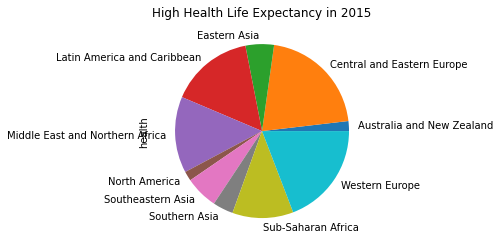

In [32]:
data2015.groupby('region')['health'].agg(lambda x: sum(x)).plot(kind='pie',title='High Health Life Expectancy in 2015')

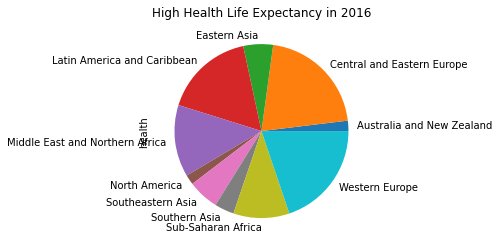

In [33]:
data2016.groupby('region')['health'].agg(lambda x: sum(x)).plot(kind='pie',title='High Health Life Expectancy in 2016')

In [34]:
data = dict(type = 'choropleth', 
           locations = data2015['country'],
           locationmode = 'country names',
           z = data2015['happiness_rank'], 
           text = data2015['country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = '2015 Global Happiness', 
                 geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
fig = go.Figure(data = [data], layout=layout)
iplot(fig)

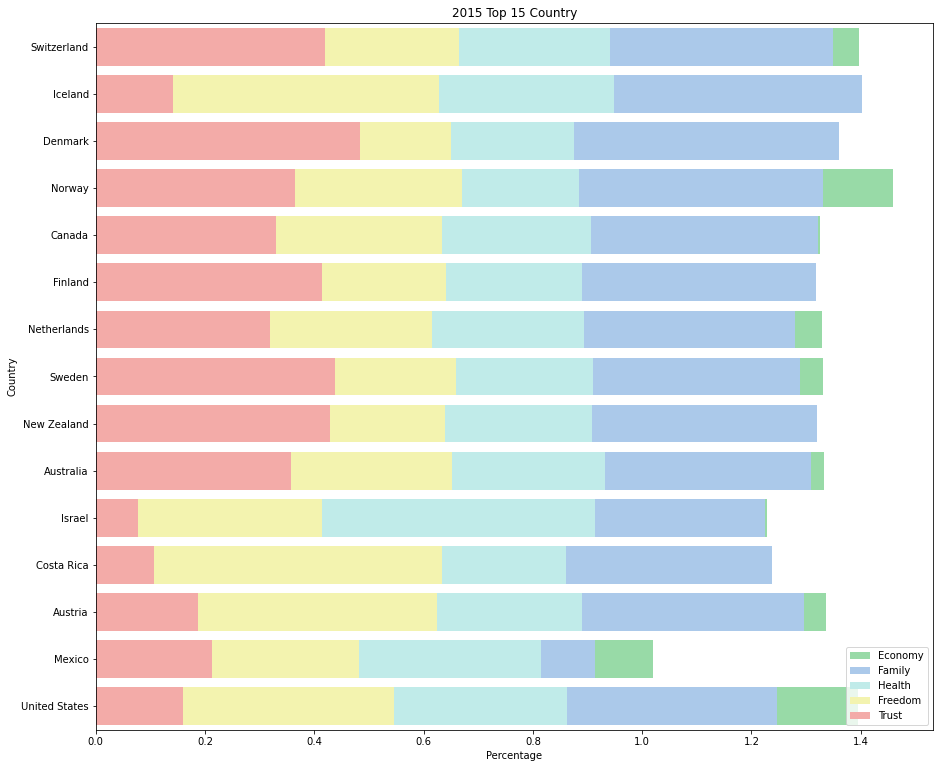

In [35]:
#Horizontal bar plot
region_lists=list(data2015['country'].head(15))
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=data2015[data2015['country']==each]
    share_economy.append(sum(region.economy)/len(region))
    share_family.append(sum(region.family)/len(region))
    share_health.append(sum(region.health)/len(region))
    share_freedom.append(sum(region.freedom)/len(region))
    share_trust.append(sum(region.trust)/len(region))

#Visualization
f,ax = plt.subplots(figsize = (15,13))
sns.set_color_codes("pastel")
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage', ylabel='Country',title = "2015 Top 15 Country")
plt.show()

In [36]:
happiness2015_rank = data2015.sort_values('happiness_score', ascending=False)
happiness2016_rank = data2016.sort_values('happiness_score', ascending=False)
happiness2017_rank = data2017.sort_values('happiness_score', ascending=False)

trace1 = go.Bar(
            x=happiness2015_rank.country.head(15),
            y=happiness2015_rank.happiness_score.head(15),
            opacity=0.65,
            name='2015 Happiness'
        )

trace2 = go.Bar(
            x=happiness2016_rank.country.head(15),
            y=happiness2016_rank.happiness_score.head(15),
            opacity=0.65,
            name='2016 Happiness'
        )
trace3 = go.Bar(
            x=happiness2017_rank.country.head(15),
            y=happiness2017_rank.happiness_score.head(15),
            opacity=0.65,
            name='2017 Happiness'
        )

fig = tools.make_subplots(rows=3, cols=1, subplot_titles=())
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height=650, width=900, title='Ranking of Happiness by Year')
iplot(fig)

In [37]:
freedom2015_rank = data2015.sort_values('freedom', ascending=False)
freedom2016_rank = data2016.sort_values('freedom', ascending=False)
freedom2017_rank = data2017.sort_values('freedom', ascending=False)

trace1 = go.Bar(
            x=freedom2015_rank.country.head(15),
            y=freedom2015_rank.freedom.head(15),
            opacity=0.65,
            name='2015 Freedom'
        )

trace2 = go.Bar(
            x=freedom2016_rank.country.head(15),
            y=freedom2016_rank.freedom.head(15),
            opacity=0.65,
            name='2016 Freedom'
        )
trace3 = go.Bar(
            x=freedom2017_rank.country.head(15),
            y=freedom2017_rank.freedom.head(15),
            opacity=0.65,
            name='2017 Freedom'
        )

fig = tools.make_subplots(rows=3, cols=1, subplot_titles=())
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height=650, width=900, title='Ranking of Freedom by Year')
iplot(fig)

In [38]:
generosity2015_rank = data2015.sort_values('generosity', ascending=False)
generosity2016_rank = data2016.sort_values('generosity', ascending=False)
generosity2017_rank = data2017.sort_values('generosity', ascending=False)

trace1 = go.Bar(
            x=generosity2015_rank.country.head(15),
            y=generosity2015_rank.generosity.head(15),
            opacity=0.65,
            name='2015 Generosity'
        )

trace2 = go.Bar(
            x=generosity2016_rank.country.head(15),
            y=generosity2016_rank.generosity.head(15),
            opacity=0.65,
            name='2016 Generosity'
        )
trace3 = go.Bar(
            x=generosity2017_rank.country.head(15),
            y=generosity2017_rank.generosity.head(15),
            opacity=0.65,
            name='2017 Generosity'
        )

fig = tools.make_subplots(rows=3, cols=1, subplot_titles=())
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height=700, width=900, title='Ranking of Generosity by Year')
iplot(fig)

In [39]:
trace1 = go.Bar(
            x= data2015.sort_values('economy', ascending=False).country.head(15),
            y=data2015.sort_values('economy', ascending=False).economy.head(15),
            opacity=0.65,
            name='2015 Economy'
        )

trace2 = go.Bar(
            x= data2016.sort_values('economy', ascending=False).country.head(15),
            y= data2016.sort_values('economy', ascending=False).economy.head(15),
            opacity=0.65,
            name='2016 Economy'
        )
trace3 = go.Bar(
            x=data2017.sort_values('economy', ascending=False).country.head(15),
            y=data2017.sort_values('economy', ascending=False).economy.head(15),
            opacity=0.65,
            name='2017 Economy'
        )


fig = tools.make_subplots(rows=3, cols=1, subplot_titles=())
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height=550, width=900, title='2015 vs 2016 vs 2017')
iplot(fig)

In [40]:
trace1 = go.Bar(
            x= data2015.sort_values('family', ascending=False).country.head(15),
            y=data2015.sort_values('family', ascending=False).family.head(15),
            opacity=0.65,
            name='2015 Family'
        )

trace2 = go.Bar(
            x= data2016.sort_values('family', ascending=False).country.head(15),
            y= data2016.sort_values('family', ascending=False).family.head(15),
            opacity=0.65,
            name='2016 Family'
        )
trace3 = go.Bar(
            x=data2017.sort_values('family', ascending=False).country.head(15),
            y=data2017.sort_values('family', ascending=False).family.head(15),
            opacity=0.65,
            name='2017 Family'
        )


fig = tools.make_subplots(rows=3, cols=1, subplot_titles=())
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height=550, width=900, title='2015 vs 2016 vs 2017')
iplot(fig)

In [41]:
trace1 = go.Bar(
            x= data2015.sort_values('freedom', ascending=False).country.head(15),
            y=data2015.sort_values('freedom', ascending=False).freedom.head(15),
            opacity=0.65,
            name='2015 Freedom'
        )

trace2 = go.Bar(
            x= data2016.sort_values('freedom', ascending=False).country.head(15),
            y= data2016.sort_values('freedom', ascending=False).freedom.head(15),
            opacity=0.65,
            name='2016 Freedom'
        )
trace3 = go.Bar(
            x=data2017.sort_values('freedom', ascending=False).country.head(15),
            y=data2017.sort_values('freedom', ascending=False).freedom.head(15),
            opacity=0.65,
            name='2017 freedom'
        )


fig = tools.make_subplots(rows=3, cols=1, subplot_titles=())
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height=600, width=900, title='2015 vs 2016 vs 2017')
iplot(fig)

## Hypothesis Testing and Correlation

Generosity does affect Happiness score as the p_value (4.122026400274256e-163) < 0.05


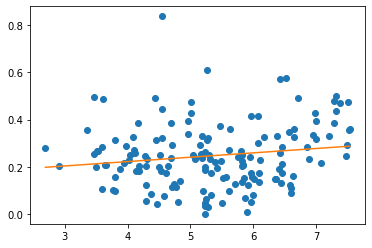

[[1.         0.15525584]
 [0.15525584 1.        ]]


In [42]:
# T-test to check dependency of smoking on charges
Ho = "Generosity does not affect Happiness score"   # Stating the Null Hypothesis
Ha = "Generosity does affect Happiness score"   # Stating the Alternate Hypothesis

x = np.array(data2017.happiness_score)  # Selecting charges corresponding to smokers as an array
y = np.array(data2017.generosity) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

b, m = polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, b + m * x, '-')
plt.show()

print(np.corrcoef(x, y,rowvar=False))

### Correlation cooefficient is 0.15525, which is very weak

Trust does affect Happiness score as the p_value (2.1048025029615505e-166) < 0.05


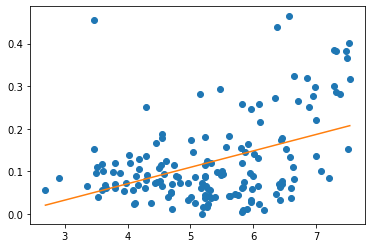

[[1.         0.42907974]
 [0.42907974 1.        ]]


In [43]:
# T-test to check dependency of smoking on charges
Ho = "Trust does not affect Happiness score"   # Stating the Null Hypothesis
Ha = "Trust does affect Happiness score"   # Stating the Alternate Hypothesis

x = np.array(data2017.happiness_score)  # Selecting charges corresponding to smokers as an array
y = np.array(data2017.trust) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

b, m = polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, b + m * x, '-')
plt.show()

print(np.corrcoef(x, y,rowvar=False))

### Correlation coefficient is 0.42907974, which is moderate

Dystopia does affect Happiness score as the p_value (3.527091646284123e-110) < 0.05


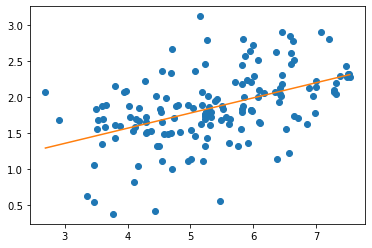

[[1.         0.47535512]
 [0.47535512 1.        ]]


In [44]:
Ho = "Dystopia does not affect Happiness score"   # Stating the Null Hypothesis
Ha = "Dystopia does affect Happiness score"   # Stating the Alternate Hypothesis

x = np.array(data2017.happiness_score)  # Selecting charges corresponding to smokers as an array
y = np.array(data2017.dystopia) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

b, m = polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, b + m * x, '-')
plt.show()

print(np.corrcoef(x, y,rowvar=False))

### Correlation cooefficient is 0.47535512 which is strong

## QQ Plot:- test for normality

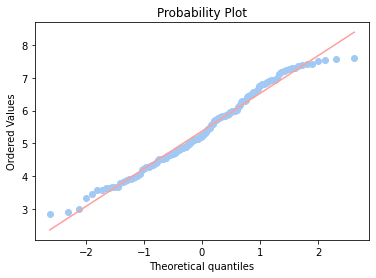

In [45]:
stats.probplot(data2015.happiness_score, dist="norm", plot=pylab)
pylab.show()

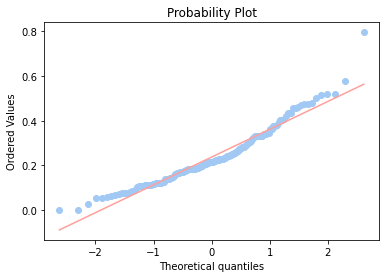

In [46]:
stats.probplot(data2015.generosity, dist="norm", plot=pylab)
pylab.show()

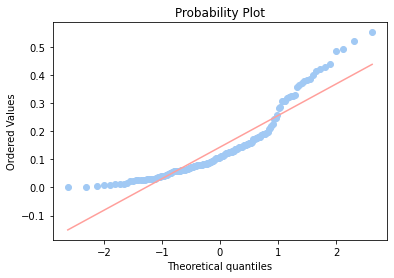

In [47]:
stats.probplot(data2015.trust, dist="norm", plot=pylab)
pylab.show()

### None of the columns above, are normally distributed

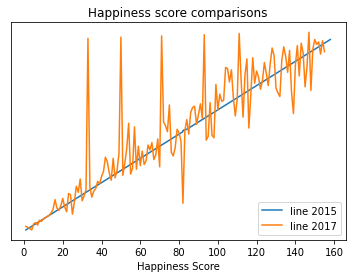

In [48]:

plt.plot(data2015.happiness_rank, data2015.country, label = "line 2015")
plt.xlabel('Happiness Score')

plt.gca().axes.get_yaxis().set_visible(False)

#plt.plot(data2016.generosity, data2016.happiness_score, label = "line 2016")
plt.plot(data2017.happiness_rank, data2017.country, label = "line 2017")
# plotting the line 2 points 
# Set a title of the current axes.
plt.title('Happiness score comparisons')
plt.legend()
plt.show()

### We can see that some countires are much happier in 2017, while a few have dropped their happiness scores. There might have been policy changes, trust issues that might have caused the change.

In [49]:
# Create x, where x the 'scores' column's values as floats
x = data2015[['happiness_score']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data2015.happiness_score = pd.DataFrame(x_scaled)
data2015.happiness_score

0      1.000000
1      0.994524
2      0.987363
3      0.986310
4      0.966302
         ...   
153    0.131845
154    0.105518
155    0.035173
156    0.013901
157    0.000000
Name: happiness_score, Length: 158, dtype: float64

In [50]:
# Create x, where x the 'scores' column's values as floats
x = data2015[['generosity']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data2015.generosity = pd.DataFrame(x_scaled)
data2015.generosity

0      0.372895
1      0.548198
2      0.428947
3      0.435983
4      0.575602
         ...   
153    0.284314
154    0.229432
155    0.592790
156    0.247864
157    0.209592
Name: generosity, Length: 158, dtype: float64

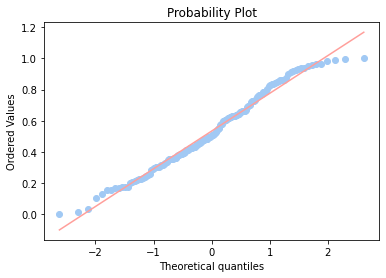

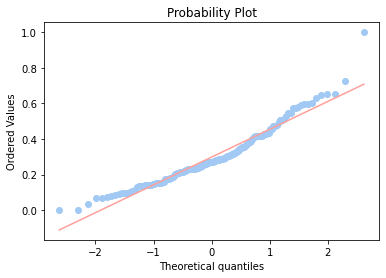

In [51]:
stats.probplot(data2015.happiness_score, dist="norm", plot=pylab)
pylab.show()
stats.probplot(data2015.generosity, dist="norm", plot=pylab)
pylab.show()